<a href="https://colab.research.google.com/github/everestso/Spring2021/blob/main/s21DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Common imports
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Common imports
import os
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
datasetsDir = "/content/gdrive/My Drive/csuf/S20/Resources/Datasets/"
csv_path = os.path.join(datasetsDir, "MlSimpleTest1 - Sheet4.csv")
data = pd.read_csv(csv_path)
print(data)

   y  A1  A2  A3
0  0   1   0   0
1  0   1   0   1
2  0   0   1   0
3  1   1   1   1
4  1   1   1   0


In [4]:
X = data.drop("y", axis=1)
Y=data['y'].values

classifier1 = DecisionTreeClassifier(criterion="gini")
classifier2 = DecisionTreeClassifier(criterion="entropy")
classifier1.fit(X,Y)
classifier2.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

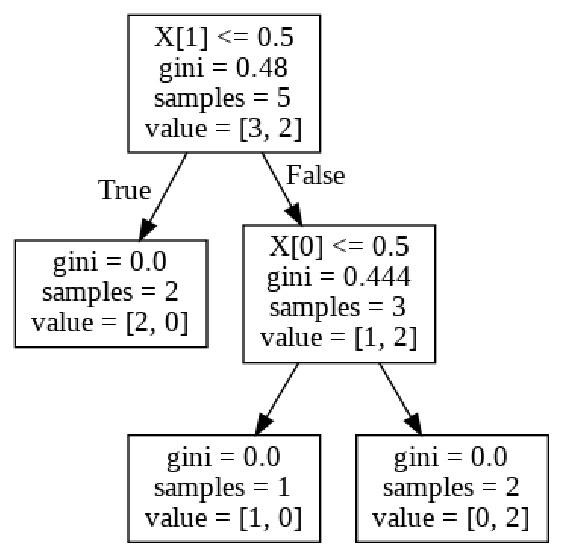

In [5]:
from sklearn import tree

import matplotlib.image as mpimg
import pydotplus

dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(classifier1, out_file = dotfile)
dotfile.close()
##dot_data = io.StringIO()
##tree.export_graphviz(classifier, out_file=dot_data)
graph = pydotplus.graph_from_dot_file("dtree2.dot")
graph.write_png('test.png')
img=mpimg.imread('test.png')
fig = plt.figure(figsize=(30, 10)) 
plt.axis("off")
plt.imshow(img, cmap = plt.cm.binary,
           interpolation="nearest")
plt.show()